# Simple and Multi Linear Regression


> "An approximate answer to the right problem is worth a good deal more than an exact answer to an approximate problem."


> -- John Tukey


> Prediction is very difficult, especially about the future.

> -- Nostradamus

# Simple Linear Regression

### Caso tipo (semplificato)

Abbiamo i dati di una azienda che riguardano gli anni di esperienza dei dipendenti (totali) e il salario corrisposto.
Il management per esperienza **sa** che esiste un qualche tipo di correlazione tra gli anni di esperienza ed lo stipendio, ma vorrebbe sapere in quale tipo di relazione consiste.
Magari fino a quel momento si sono basati sulla loro esperienza personale per stabilire il range degli stipendi e siccome stanno per affrontare nuove assunzioni vorrebbero individuare la regola da applicare per stabilire l'offerta economica.

In [1]:
dataset = read.csv('./datasets/Salary_Data.csv')
dataset

YearsExperience Salary
1   1.1             39343
2   1.3             46205
3   1.5             37731
4   2.0             43525
5   2.2             39891
6   2.9             56642
7   3.0             60150
8   3.2             54445
9   3.2             64445
10  3.7             57189
11  3.9             63218
12  4.0             55794
13  4.0             56957
14  4.1             57081
15  4.5             61111
16  4.9             67938
17  5.1             66029
18  5.3             83088
19  5.9             81363
20  6.0             93940
21  6.8             91738
22  7.1             98273
23  7.9            101302
24  8.2            113812
25  8.7            109431
26  9.0            105582
27  9.5            116969
28  9.6            112635
29 10.3            122391
30 10.5            121872

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

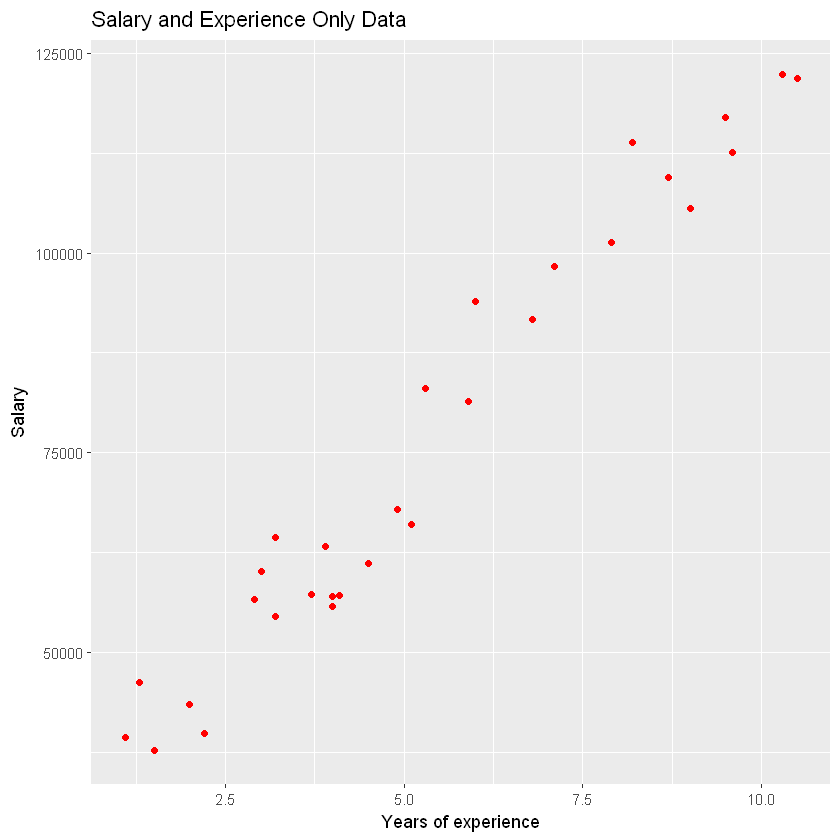

In [2]:
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$YearsExperience, y = dataset$Salary),
             colour = 'red') +
  ggtitle('Salary and Experience Only Data') +
  xlab('Years of experience') +
  ylab('Salary')

### Com'è fatta sta linea

## y = b<sub>0</sub> + b<sub>1</sub> * x<sub>1</sub>

y = variabile **dipendente**
x<sub>1</sub> = variabile **indipendente**

Vogliamo usare le osservazioni in nostro possesso per individuare la linea migliore.

### Come troviamo la *linea migliore* (o come fa la linear regression a trovarla)

Supponiamo di avere la nostra linea per tracciata sulle osservazioni tra stipendio e anni di esperienza.
Individuiamo la distanza tra *le osservazioni effettive* ( y<sub>n</sub> ) e *le osservazioni modellate* ( y<sub>^n</sub> ), cioe' quelle individuate dalla linea. 
La distanza quindi corrisponde alla sottrazione tra le *y* e le *y^*.

min(SUM(y<sub>n</sub> - y<sub>^n</sub>) <sup>2</sup>)

Questa e' la retta dei cosiddetti **_minimi quadrati_**.

### E in pratica?

Per prima cosa....

In [3]:
dataset

YearsExperience Salary
1   1.1             39343
2   1.3             46205
3   1.5             37731
4   2.0             43525
5   2.2             39891
6   2.9             56642
7   3.0             60150
8   3.2             54445
9   3.2             64445
10  3.7             57189
11  3.9             63218
12  4.0             55794
13  4.0             56957
14  4.1             57081
15  4.5             61111
16  4.9             67938
17  5.1             66029
18  5.3             83088
19  5.9             81363
20  6.0             93940
21  6.8             91738
22  7.1             98273
23  7.9            101302
24  8.2            113812
25  8.7            109431
26  9.0            105582
27  9.5            116969
28  9.6            112635
29 10.3            122391
30 10.5            121872

In [5]:
library(caTools) 

set.seed(123) 
split = sample.split(dataset$Salary, SplitRatio = 0.75)#splitRatio e' la percentuale delle osservazioni che vogliamo 
                                                         #includere nel training set
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)
# training_set
 test_set

YearsExperience Salary
4  2.0              43525
5  2.2              39891
8  3.2              54445
11 3.9              63218
16 4.9              67938
20 6.0              93940
21 6.8              91738
24 8.2             113812

#### Fase di regressione

In [6]:
regressor = lm(formula = Salary ~ YearsExperience,
               data = training_set)

_formula_ esprime la variabile dipendente come combinazione lineare della variabile indipendente

In [7]:
#vediamo cosa contiene il nostro regressor
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-7853.2 -3691.2   904.8  3191.0  8080.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      27232.5     2474.3   11.01 6.17e-10 ***
YearsExperience   9103.7      392.9   23.17 6.38e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5471 on 20 degrees of freedom
Multiple R-squared:  0.9641,	Adjusted R-squared:  0.9623 
F-statistic:   537 on 1 and 20 DF,  p-value: 6.382e-16


Per ora concentriamoci sui _Coefficients_:
Abbiamo il valore del coefficiente nella nostra equazione ed anche la sua rilevanza statistica.

Passiamo al lavoro sporco...

In [8]:
# creiamo il vettore che conterrà le predizioni
y_pred = predict(regressor, newdata = test_set)
y_pred

4         5         8        11        16        20        21        24 
 45439.82  47260.56  56364.22  62736.79  71840.46  81854.50  89137.43 101882.57

... visualizziamo la bontà della nostra linea di regressione

In [11]:
test_set

YearsExperience Salary
4  2.0              43525
5  2.2              39891
8  3.2              54445
11 3.9              63218
16 4.9              67938
20 6.0              93940
21 6.8              91738
24 8.2             113812

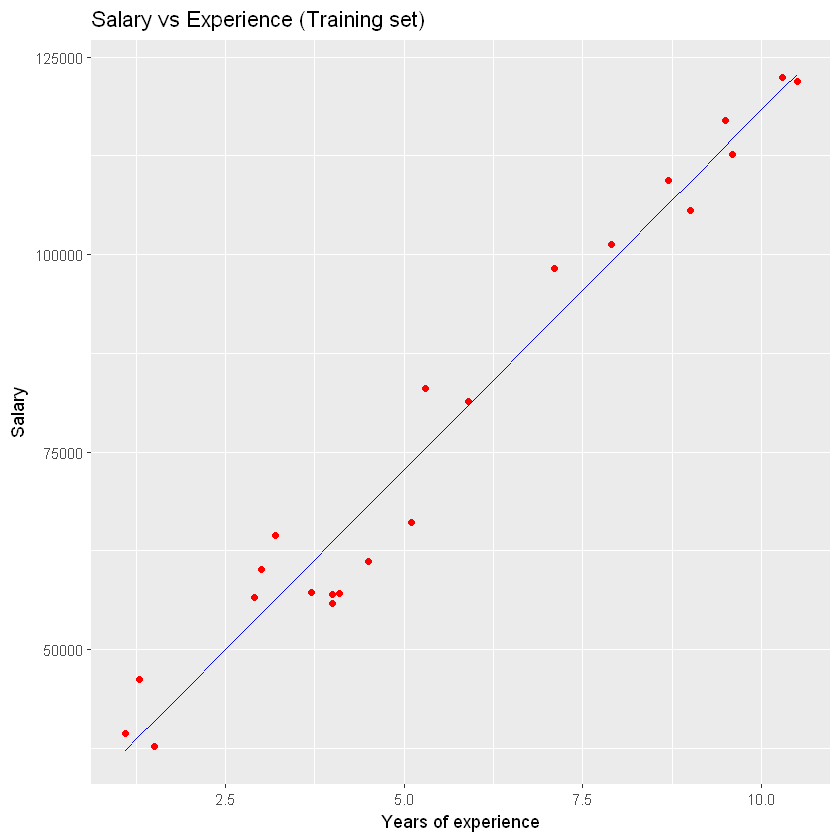

In [9]:
# visualizziamo prima le osservazioni reali

ggplot() + 
    geom_point(aes(x = training_set$YearsExperience, y = training_set$Salary),
               color = 'red')+# li visualizziamo come punti geometrici
    geom_line(aes( x = training_set$YearsExperience, y = predict(regressor, 
               newdata = training_set)),color = 'blue')+ 
    ggtitle('Salary vs Experience (Training set)') +
    xlab('Years of experience') +
    ylab('Salary')

E per il test_set?

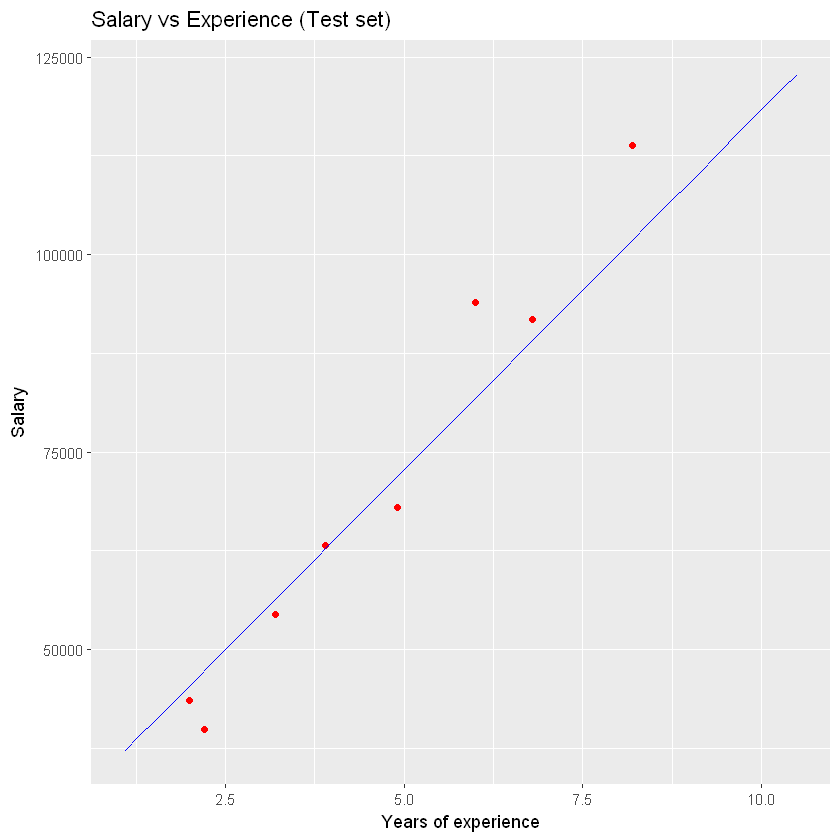

In [10]:
ggplot() +
  geom_point(aes(x = test_set$YearsExperience, y = test_set$Salary),
             colour = 'red') +
  geom_line(aes(x = training_set$YearsExperience, y = predict(regressor, newdata = training_set)),
            colour = 'blue') +
  ggtitle('Salary vs Experience (Test set)') +
  xlab('Years of experience') +
  ylab('Salary')

# Multiple Linear Regression

Scenario: ciò che concorre all'andamento di una variabile può dipendere da fattori multipli.
Es. vogliamo vedere quale fattore tra ore di sonno, ore di studio, ore di lezione seguite, concorrono in un risultato migliore in un esame.

### Caso di business 

Siamo un Venture Fund e vogliamo capire quale startup ha il modello di business migliore in base al budget, quali voci del budget hanno contribuito al profitto.

In [12]:
multidataset = read.csv('./datasets/50_Startups.csv')
multidataset

R.D.Spend Administration Marketing.Spend State      Profit   
1  165349.20 136897.80      471784.10       New York   192261.83
2  162597.70 151377.59      443898.53       California 191792.06
3  153441.51 101145.55      407934.54       Florida    191050.39
4  144372.41 118671.85      383199.62       New York   182901.99
5  142107.34  91391.77      366168.42       Florida    166187.94
6  131876.90  99814.71      362861.36       New York   156991.12
7  134615.46 147198.87      127716.82       California 156122.51
8  130298.13 145530.06      323876.68       Florida    155752.60
9  120542.52 148718.95      311613.29       New York   152211.77
10 123334.88 108679.17      304981.62       California 149759.96
11 101913.08 110594.11      229160.95       Florida    146121.95
12 100671.96  91790.61      249744.55       California 144259.40
13  93863.75 127320.38      249839.44       Florida    141585.52
14  91992.39 135495.07      252664.93       California 134307.35
15 119943.24 156547.42      256512.92       Florida    132602.65
16 114523.61 122616.84      261776.23       New York   129917.04
17  78013.11 121597.55      264346.06       California 126992.93
18  94657.16 145077.58      282574.31       New York   125370.37
19  91749.16 114175.79      294919.57       Florida    124266.90
20  86419.70 153514.11           0.00       New York   122776.86
21  76253.86 113867.30      298664.47       California 118474.03
22  78389.47 153773.43      299737.29       New York   111313.02
23  73994.56 122782.75      303319.26       Florida    110352.25
24  67532.53 105751.03      304768.73       Florida    108733.99
25  77044.01  99281.34      140574.81       New York   108552.04
26  64664.71 139553.16      137962.62       California 107404.34
27  75328.87 144135.98      134050.07       Florida    105733.54
28  72107.60 127864.55      353183.81       New York   105008.31
29  66051.52 182645.56      118148.20       Florida    103282.38
30  65605.48 153032.06      107138.38       New York   101004.64
31  61994.48 115641.28       91131.24       Florida     99937.59
32  61136.38 152701.92       88218.23       New York    97483.56
33  63408.86 129219.61       46085.25       California  97427.84
34  55493.95 103057.49      214634.81       Florida     96778.92
35  46426.07 157693.92      210797.67       California  96712.80
36  46014.02  85047.44      205517.64       New York    96479.51
37  28663.76 127056.21      201126.82       Florida     90708.19
38  44069.95  51283.14      197029.42       California  89949.14
39  20229.59  65947.93      185265.10       New York    81229.06
40  38558.51  82982.09      174999.30       California  81005.76
41  28754.33 118546.05      172795.67       California  78239.91
42  27892.92  84710.77      164470.71       Florida     77798.83
43  23640.93  96189.63      148001.11       California  71498.49
44  15505.73 127382.30       35534.17       New York    69758.98
45  22177.74 154806.14       28334.72       California  65200.33
46   1000.23 124153.04        1903.93       New York    64926.08
47   1315.46 115816.21      297114.46       Florida     49490.75
48      0.00 135426.92           0.00       California  42559.73
49    542.05  51743.15           0.00       New York    35673.41
50      0.00 116983.80       45173.06       California  14681.40

Intuiamo che sulla variabile dipendente possono influire diverse variabili indipendenti

y = b<sub>0</sub> + b<sub>1</sub> x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + ... + b<sub>n</sub> x<sub>n</sub>

Come facciamo a sapere qual è il modello giusto? Quale di queste variabili influisce di più sulla linea di regressione? 

#### Iniziamo!

Qual è il primo step?

In [13]:
multidataset$State = factor(multidataset$State,
                        levels = c('New York','California','Florida'),
                        labels = c(1,2,3))
multidataset

R.D.Spend Administration Marketing.Spend State Profit   
1  165349.20 136897.80      471784.10       1     192261.83
2  162597.70 151377.59      443898.53       2     191792.06
3  153441.51 101145.55      407934.54       3     191050.39
4  144372.41 118671.85      383199.62       1     182901.99
5  142107.34  91391.77      366168.42       3     166187.94
6  131876.90  99814.71      362861.36       1     156991.12
7  134615.46 147198.87      127716.82       2     156122.51
8  130298.13 145530.06      323876.68       3     155752.60
9  120542.52 148718.95      311613.29       1     152211.77
10 123334.88 108679.17      304981.62       2     149759.96
11 101913.08 110594.11      229160.95       3     146121.95
12 100671.96  91790.61      249744.55       2     144259.40
13  93863.75 127320.38      249839.44       3     141585.52
14  91992.39 135495.07      252664.93       2     134307.35
15 119943.24 156547.42      256512.92       3     132602.65
16 114523.61 122616.84      261776.23       1     129917.04
17  78013.11 121597.55      264346.06       2     126992.93
18  94657.16 145077.58      282574.31       1     125370.37
19  91749.16 114175.79      294919.57       3     124266.90
20  86419.70 153514.11           0.00       1     122776.86
21  76253.86 113867.30      298664.47       2     118474.03
22  78389.47 153773.43      299737.29       1     111313.02
23  73994.56 122782.75      303319.26       3     110352.25
24  67532.53 105751.03      304768.73       3     108733.99
25  77044.01  99281.34      140574.81       1     108552.04
26  64664.71 139553.16      137962.62       2     107404.34
27  75328.87 144135.98      134050.07       3     105733.54
28  72107.60 127864.55      353183.81       1     105008.31
29  66051.52 182645.56      118148.20       3     103282.38
30  65605.48 153032.06      107138.38       1     101004.64
31  61994.48 115641.28       91131.24       3      99937.59
32  61136.38 152701.92       88218.23       1      97483.56
33  63408.86 129219.61       46085.25       2      97427.84
34  55493.95 103057.49      214634.81       3      96778.92
35  46426.07 157693.92      210797.67       2      96712.80
36  46014.02  85047.44      205517.64       1      96479.51
37  28663.76 127056.21      201126.82       3      90708.19
38  44069.95  51283.14      197029.42       2      89949.14
39  20229.59  65947.93      185265.10       1      81229.06
40  38558.51  82982.09      174999.30       2      81005.76
41  28754.33 118546.05      172795.67       2      78239.91
42  27892.92  84710.77      164470.71       3      77798.83
43  23640.93  96189.63      148001.11       2      71498.49
44  15505.73 127382.30       35534.17       1      69758.98
45  22177.74 154806.14       28334.72       2      65200.33
46   1000.23 124153.04        1903.93       1      64926.08
47   1315.46 115816.21      297114.46       3      49490.75
48      0.00 135426.92           0.00       2      42559.73
49    542.05  51743.15           0.00       1      35673.41
50      0.00 116983.80       45173.06       2      14681.40

#### ...e ora?

In [14]:
library(caTools)
set.seed(123) 
split = sample.split(multidataset$Profit, SplitRatio = 0.8)#splitRatio e' la percentuale delle osservazioni che vogliamo 
                                                         #includere nel training set
training_set = subset(multidataset, split == TRUE)
test_set = subset(multidataset, split == FALSE)
training_set

R.D.Spend Administration Marketing.Spend State Profit   
1  165349.20 136897.80      471784.10       1     192261.83
2  162597.70 151377.59      443898.53       2     191792.06
3  153441.51 101145.55      407934.54       3     191050.39
6  131876.90  99814.71      362861.36       1     156991.12
7  134615.46 147198.87      127716.82       2     156122.51
9  120542.52 148718.95      311613.29       1     152211.77
10 123334.88 108679.17      304981.62       2     149759.96
12 100671.96  91790.61      249744.55       2     144259.40
13  93863.75 127320.38      249839.44       3     141585.52
14  91992.39 135495.07      252664.93       2     134307.35
15 119943.24 156547.42      256512.92       3     132602.65
17  78013.11 121597.55      264346.06       2     126992.93
18  94657.16 145077.58      282574.31       1     125370.37
19  91749.16 114175.79      294919.57       3     124266.90
22  78389.47 153773.43      299737.29       1     111313.02
23  73994.56 122782.75      303319.26       3     110352.25
25  77044.01  99281.34      140574.81       1     108552.04
26  64664.71 139553.16      137962.62       2     107404.34
27  75328.87 144135.98      134050.07       3     105733.54
28  72107.60 127864.55      353183.81       1     105008.31
29  66051.52 182645.56      118148.20       3     103282.38
30  65605.48 153032.06      107138.38       1     101004.64
33  63408.86 129219.61       46085.25       2      97427.84
34  55493.95 103057.49      214634.81       3      96778.92
35  46426.07 157693.92      210797.67       2      96712.80
36  46014.02  85047.44      205517.64       1      96479.51
37  28663.76 127056.21      201126.82       3      90708.19
38  44069.95  51283.14      197029.42       2      89949.14
39  20229.59  65947.93      185265.10       1      81229.06
40  38558.51  82982.09      174999.30       2      81005.76
41  28754.33 118546.05      172795.67       2      78239.91
42  27892.92  84710.77      164470.71       3      77798.83
43  23640.93  96189.63      148001.11       2      71498.49
44  15505.73 127382.30       35534.17       1      69758.98
45  22177.74 154806.14       28334.72       2      65200.33
46   1000.23 124153.04        1903.93       1      64926.08
47   1315.46 115816.21      297114.46       3      49490.75
48      0.00 135426.92           0.00       2      42559.73
49    542.05  51743.15           0.00       1      35673.41
50      0.00 116983.80       45173.06       2      14681.40

In [15]:
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
              data = training_set)
#regressor = lm(formula = Profit ~ .)
#formula = stiamo dicendo che la variabile dipendente (profit) è una combinazione lineare delle variabili indipendenti
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33128  -4865      5   6098  18065 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.965e+04  7.637e+03   6.501 1.94e-07 ***
R.D.Spend        7.986e-01  5.604e-02  14.251 6.70e-16 ***
Administration  -2.942e-02  5.828e-02  -0.505    0.617    
Marketing.Spend  3.268e-02  2.127e-02   1.537    0.134    
State2           1.213e+02  3.751e+03   0.032    0.974    
State3           2.376e+02  4.127e+03   0.058    0.954    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9908 on 34 degrees of freedom
Multiple R-squared:  0.9499,	Adjusted R-squared:  0.9425 
F-statistic:   129 on 5 and 34 DF,  p-value: < 2.2e-16


Osserviamo le proprietà del nostro regressor.

Vediamo che solo una delle variabili indipendenti è altamente significativa per il nostro modello.
Cosa vuol dire? Le altre variabili sono o non sono utili? 
Se scegliessimo le migliori potremmo migliorare il nostro modello predittivo?

Per prima cosa vediamo le prime predizioni effettuate...

In [16]:
y_pred = predict(regressor, newdata = test_set)
y_pred

4         5         8        11        16        20        21        24 
173981.09 172655.64 160250.02 135513.90 146059.36 114151.03 117081.62 110671.31 
       31        32 
 98975.29  96867.03

In [17]:
#e confrontiamole con il valore attuale nel nostro dataset.
test_set

R.D.Spend Administration Marketing.Spend State Profit   
4  144372.41 118671.85      383199.62       1     182901.99
5  142107.34  91391.77      366168.42       3     166187.94
8  130298.13 145530.06      323876.68       3     155752.60
11 101913.08 110594.11      229160.95       3     146121.95
16 114523.61 122616.84      261776.23       1     129917.04
20  86419.70 153514.11           0.00       1     122776.86
21  76253.86 113867.30      298664.47       2     118474.03
24  67532.53 105751.03      304768.73       3     108733.99
31  61994.48 115641.28       91131.24       3      99937.59
32  61136.38 152701.92       88218.23       1      97483.56

## Costruire il modello migliore

Esistono diversi algoritmi che ci consentono di ottenere il miglior modello di variabili:
1. All-in
2. Stepwise Regression
 * Backward elimination
 * Forward Selection
 * Bidirectional elimination
3. Score comparison

## All-in

Buttiamo tutte le variabili all'interno del nostro modello MA funziona solo se:
- abbiamo conoscenza a priori sulle variabili e sappiamo che vanno bene
- sei costretto a farlo per un qualsiasi motivo

## Stepwise regression

### Backward elimination

+ Step 1 : decidiamo un livello di significatività statistica per decidere se una variabile resta o meno nel modello
+ Step 2 : generiamo un primo modello con tutte le variabili 
+ Step 3 : individuiamo la variabile con il p-value più grande. 
    + se il p-value è più grande del livello di significatività scelto vai allo step 4
    + altrimenti FINE, il modello è pronto
+ Step 4 : rimuoviamo la variabile con il p-value più grande
+ Step 5 : ri-generiamo il modello (i coefficienti saranno diversi...)
+ Ricomincio dallo step 3


### Forward selection

Potrebbe sembrare l'opposto della backward elimination ma non lo è, vediamo:
+ Step 1 : decidiamo un livello di significatività statistica per decidere se una variabile entra nel modello
+ Step 2 : generiamo un modello per ogni variabile y ~ x<sub>n</sub> e selezioniamo la variabile con il p-value più basso
+ Step 3 : teniamo questa variabile e rigeneriamo tutti i modelli includendola
+ Step 4 : selezioniamo il modello con il p-value più basso. Se:
     + p < livello di significatività scelto allora torniamo allo Step 3
     + altrimenti FINE (ma stiamo attenti a non introdurre quella variabile che ha il p-value più alto di SL)


### Bidirectional elimination

+ Step 1 : decidiamo un livello di significatività statistica per decidere se una variabile entra nel modello (SLENTER)e un livello per decidere se una variabile resta nel modello (SLSTAY)
+ Step 2 : corrisponde allo Step 2 della forward selection (p < SLENTER)
+ Step 3 : eseguiamo tutti gli step di Backward elimination (p < SLSTAY)
+ Step 4 : non ci sono variabili che riescono ad entrare e non ci sono altri variabili per possono restare


## Score comparison

+ Step 1 : scegliamo un criterio di bontà di adattamento 
+ Step 2 : costruiamo tutti i possibili modelli di regressione: 2<sup>n</sup>-1 combinazioni
+ Step 3 : Si sceglie il modello col il miglior criterio


# Costruire il modello giusto usando la Backward elimination
Abbiamo usato usato tutte le variabili indipendenti per costruire il nostro regressore. 

`regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
              data = training_set)`
              
Come possiamo migliorarlo?


In [18]:
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + State,
              data = multidataset)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend + 
    State, data = multidataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33504  -4736     90   6672  17338 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.008e+04  6.953e+03   7.204 5.76e-09 ***
R.D.Spend        8.060e-01  4.641e-02  17.369  < 2e-16 ***
Administration  -2.700e-02  5.223e-02  -0.517    0.608    
Marketing.Spend  2.698e-02  1.714e-02   1.574    0.123    
State2           4.189e+01  3.256e+03   0.013    0.990    
State3           2.407e+02  3.339e+03   0.072    0.943    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9439 on 44 degrees of freedom
Multiple R-squared:  0.9508,	Adjusted R-squared:  0.9452 
F-statistic: 169.9 on 5 and 44 DF,  p-value: < 2.2e-16


In [19]:
regressor = lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend,
              data = multidataset)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Administration + Marketing.Spend, 
    data = multidataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33534  -4795     63   6606  17275 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.012e+04  6.572e+03   7.626 1.06e-09 ***
R.D.Spend        8.057e-01  4.515e-02  17.846  < 2e-16 ***
Administration  -2.682e-02  5.103e-02  -0.526    0.602    
Marketing.Spend  2.723e-02  1.645e-02   1.655    0.105    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9232 on 46 degrees of freedom
Multiple R-squared:  0.9507,	Adjusted R-squared:  0.9475 
F-statistic:   296 on 3 and 46 DF,  p-value: < 2.2e-16


In [20]:
regressor = lm(formula = Profit ~ R.D.Spend + Marketing.Spend,
              data = multidataset)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = multidataset)

Residuals:
   Min     1Q Median     3Q    Max 
-33645  -4632   -414   6484  17097 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.698e+04  2.690e+03  17.464   <2e-16 ***
R.D.Spend       7.966e-01  4.135e-02  19.266   <2e-16 ***
Marketing.Spend 2.991e-02  1.552e-02   1.927     0.06 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9161 on 47 degrees of freedom
Multiple R-squared:  0.9505,	Adjusted R-squared:  0.9483 
F-statistic: 450.8 on 2 and 47 DF,  p-value: < 2.2e-16


In [21]:
regressor = lm(formula = Profit ~ R.D.Spend + Marketing.Spend,
              data = training_set)
summary(regressor)


Call:
lm(formula = Profit ~ R.D.Spend + Marketing.Spend, data = training_set)

Residuals:
   Min     1Q Median     3Q    Max 
-33294  -4763   -354   6351  17693 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.638e+04  3.019e+03  15.364   <2e-16 ***
R.D.Spend       7.879e-01  4.916e-02  16.026   <2e-16 ***
Marketing.Spend 3.538e-02  1.905e-02   1.857   0.0713 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9533 on 37 degrees of freedom
Multiple R-squared:  0.9495,	Adjusted R-squared:  0.9468 
F-statistic: 348.1 on 2 and 37 DF,  p-value: < 2.2e-16


In [22]:
y_pred = predict(regressor, newdata = test_set)
y_pred

4         5         8        11        16        20        21        24 
173687.21 171299.96 160499.08 134783.16 145873.04 114467.75 117025.30 110369.71 
       31        32 
 98447.39  97668.22

In [23]:
#riconfrontiamole con il valore attuale nel nostro dataset.
test_set

R.D.Spend Administration Marketing.Spend State Profit   
4  144372.41 118671.85      383199.62       1     182901.99
5  142107.34  91391.77      366168.42       3     166187.94
8  130298.13 145530.06      323876.68       3     155752.60
11 101913.08 110594.11      229160.95       3     146121.95
16 114523.61 122616.84      261776.23       1     129917.04
20  86419.70 153514.11           0.00       1     122776.86
21  76253.86 113867.30      298664.47       2     118474.03
24  67532.53 105751.03      304768.73       3     108733.99
31  61994.48 115641.28       91131.24       3      99937.59
32  61136.38 152701.92       88218.23       1      97483.56

### Fatto!

Abbiamo costruito il miglior modello possibile con le nostre variabili!

## Assunzioni

Normalmente, prima di iniziare qualsiasi lavoro di regressione lineare dovremmo sempre verificare le seguenti assunzioni:

- Linearità
- Omoschedasticità (per i poveri mortali come noi: stessa varianza)
- Normalità multivariata (la combinazione lineare delle variabili deve avere distribuzione normale)
- Indipendenza degli errori
- Assenza di multicolinearità (che sorge quando c'è un'elevata correlazione tra due o più variabili : in un modello di regressione y = x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub> se x<sub>2</sub> è una trasformazione lineare di x<sub>1</sub> e quindi sussiste una relazione del tipo x<sub>2</sub> = a + bx<sub>1</sub>, le due variabili sono perfettamente correlate.)
